In [384]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 븐류
# from sklearn.neighbors import KNeighborsRegressor # 회귀- 예측
from sklearn.linear_model import LinearRegression # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
import glob, os.path, re

matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
# matplotlib.rcParams['font.family'] = 'AppleGothic Gothic'

In [385]:
picher = pd.read_csv('picher_stats_2017.csv')
picher.shape
df = picher

In [386]:
# 데이터 확인

# nan,0, 타입, 데이터 간격
# str에 대한 데이터 분리
# picher.describe()
# picher.info()
# 결과값의 파악 : picher['연봉(2018)'] 
# hist그래프 출력
# 각각 피쳐간 상관관계 corr, hitmap
# 각각 피쳐를 출력 subplots 각각 데이터 분포 파악 
# ( 0 데이터가 어느정도 있는지, 데이터 분포가 어떻게 되는지 )

# 결과값 파악
picher.info

<bound method DataFrame.info of      선수명   팀명   승   패  세  홀드  블론  경기  선발     이닝  ...  홈런/9  BABIP  LOB%  \
0     켈리   SK  16   7  0   0   0  30  30  190.0  ...  0.76  0.342  73.7   
1     소사   LG  11  11  1   0   0  30  29  185.1  ...  0.53  0.319  67.1   
2    양현종  KIA  20   6  0   0   0  31  31  193.1  ...  0.79  0.332  72.1   
3    차우찬   LG  10   7  0   0   0  28  28  175.2  ...  1.02  0.298  75.0   
4    레일리   롯데  13   7  0   0   0  30  30  187.1  ...  0.91  0.323  74.1   
..   ...  ...  ..  .. ..  ..  ..  ..  ..    ...  ...   ...    ...   ...   
147  장민재   한화   2   5  0   0   2  33   5   62.2  ...  1.58  0.355  56.9   
148  정용운  KIA   3   2  0   0   0  25  11   59.1  ...  1.06  0.263  65.4   
149  노경은   롯데   0   2  0   0   0   9   2   14.2  ...  2.45  0.382  52.8   
150  김승현   삼성   0   3  0   1   0  41   0   43.2  ...  1.44  0.341  73.9   
151  류희운   KT   4   4  0   0   0  24  14   81.0  ...  2.00  0.312  65.3   

       ERA  RA9-WAR   FIP  kFIP   WAR  연봉(2018)  연봉(2017)  
0     3

In [387]:
# str  :선수명, 팀명

In [388]:
picher.describe()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
count,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000,152.000000
mean,3.197368,3.157895,1.473684,2.644737,0.888158,28.848684,6.092105,56.953947,7.049605,4.183289,1.209934,0.340507,68.523026,6.046053,1.056908,5.506842,5.536776,0.665921,18932.236842,16505.263158
std,3.863635,3.130929,4.808860,4.515474,1.633869,19.371502,9.750093,50.297632,2.827552,2.362819,1.017072,0.088985,11.591590,4.166645,1.843708,1.871047,1.981596,1.322205,30940.732924,25046.478092
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,35.700000,0.000000,-1.210000,0.730000,-0.690000,-1.010000,2700.000000,2700.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,19.900000,5.492500,2.585000,0.690000,0.303750,62.400000,4.082500,-0.092500,4.437500,4.347500,-0.060000,4000.000000,3000.000000
50%,2.000000,2.000000,0.000000,0.000000,0.000000,26.000000,0.000000,43.700000,6.900000,3.750000,1.070000,0.333000,68.250000,5.355000,0.330000,5.210000,5.320000,0.130000,7550.000000,6000.000000
75%,5.000000,6.000000,0.000000,3.000000,1.000000,41.000000,7.000000,80.325000,8.212500,5.262500,1.550000,0.364000,74.525000,7.055000,1.522500,6.392500,6.570000,0.930000,18500.000000,15250.000000
max,20.000000,12.000000,37.000000,24.000000,7.000000,75.000000,31.000000,193.100000,22.500000,18.000000,9.000000,0.833000,100.000000,36.000000,7.280000,18.730000,17.600000,6.620000,230000.000000,150000.000000


<Axes: >

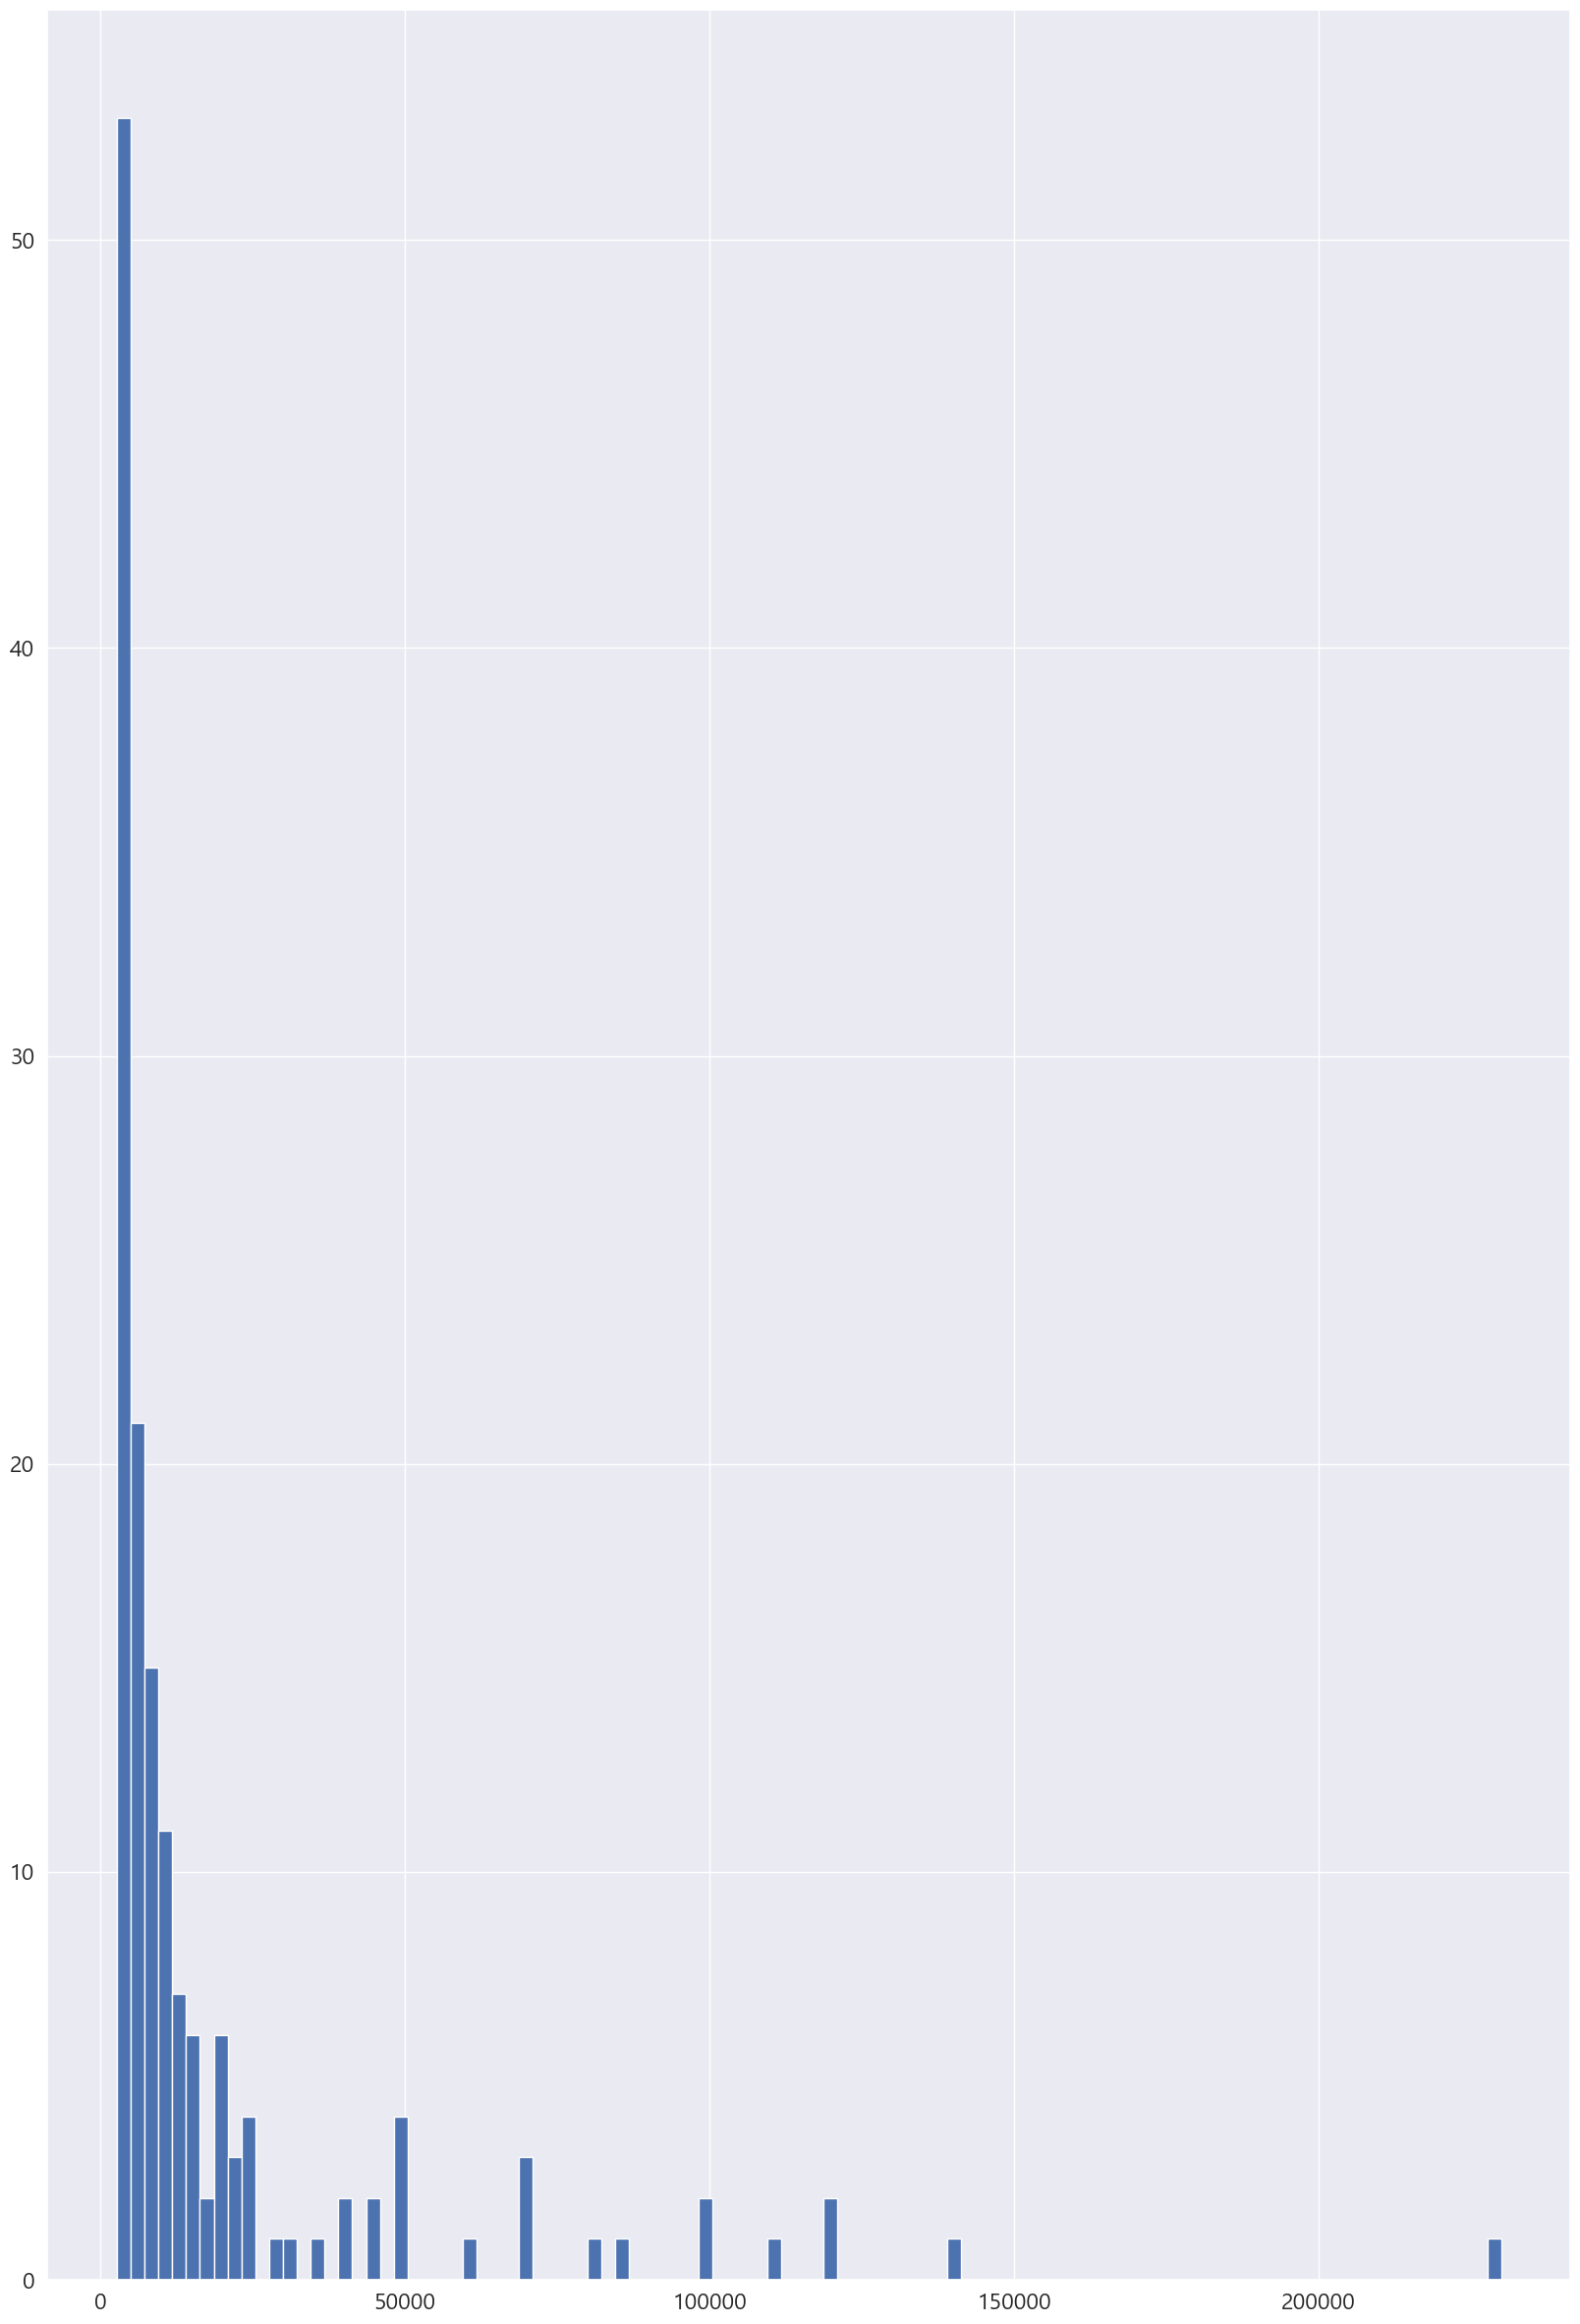

In [389]:
# 연봉 그래프
picher['연봉(2018)'].hist(bins=100)

In [390]:
picher['연봉(2018)'].sort_values()

103      2700
93       2700
115      2700
82       2800
105      2800
        ...  
4      111000
20     120000
1      120000
0      140000
2      230000
Name: 연봉(2018), Length: 152, dtype: int64

<Axes: >

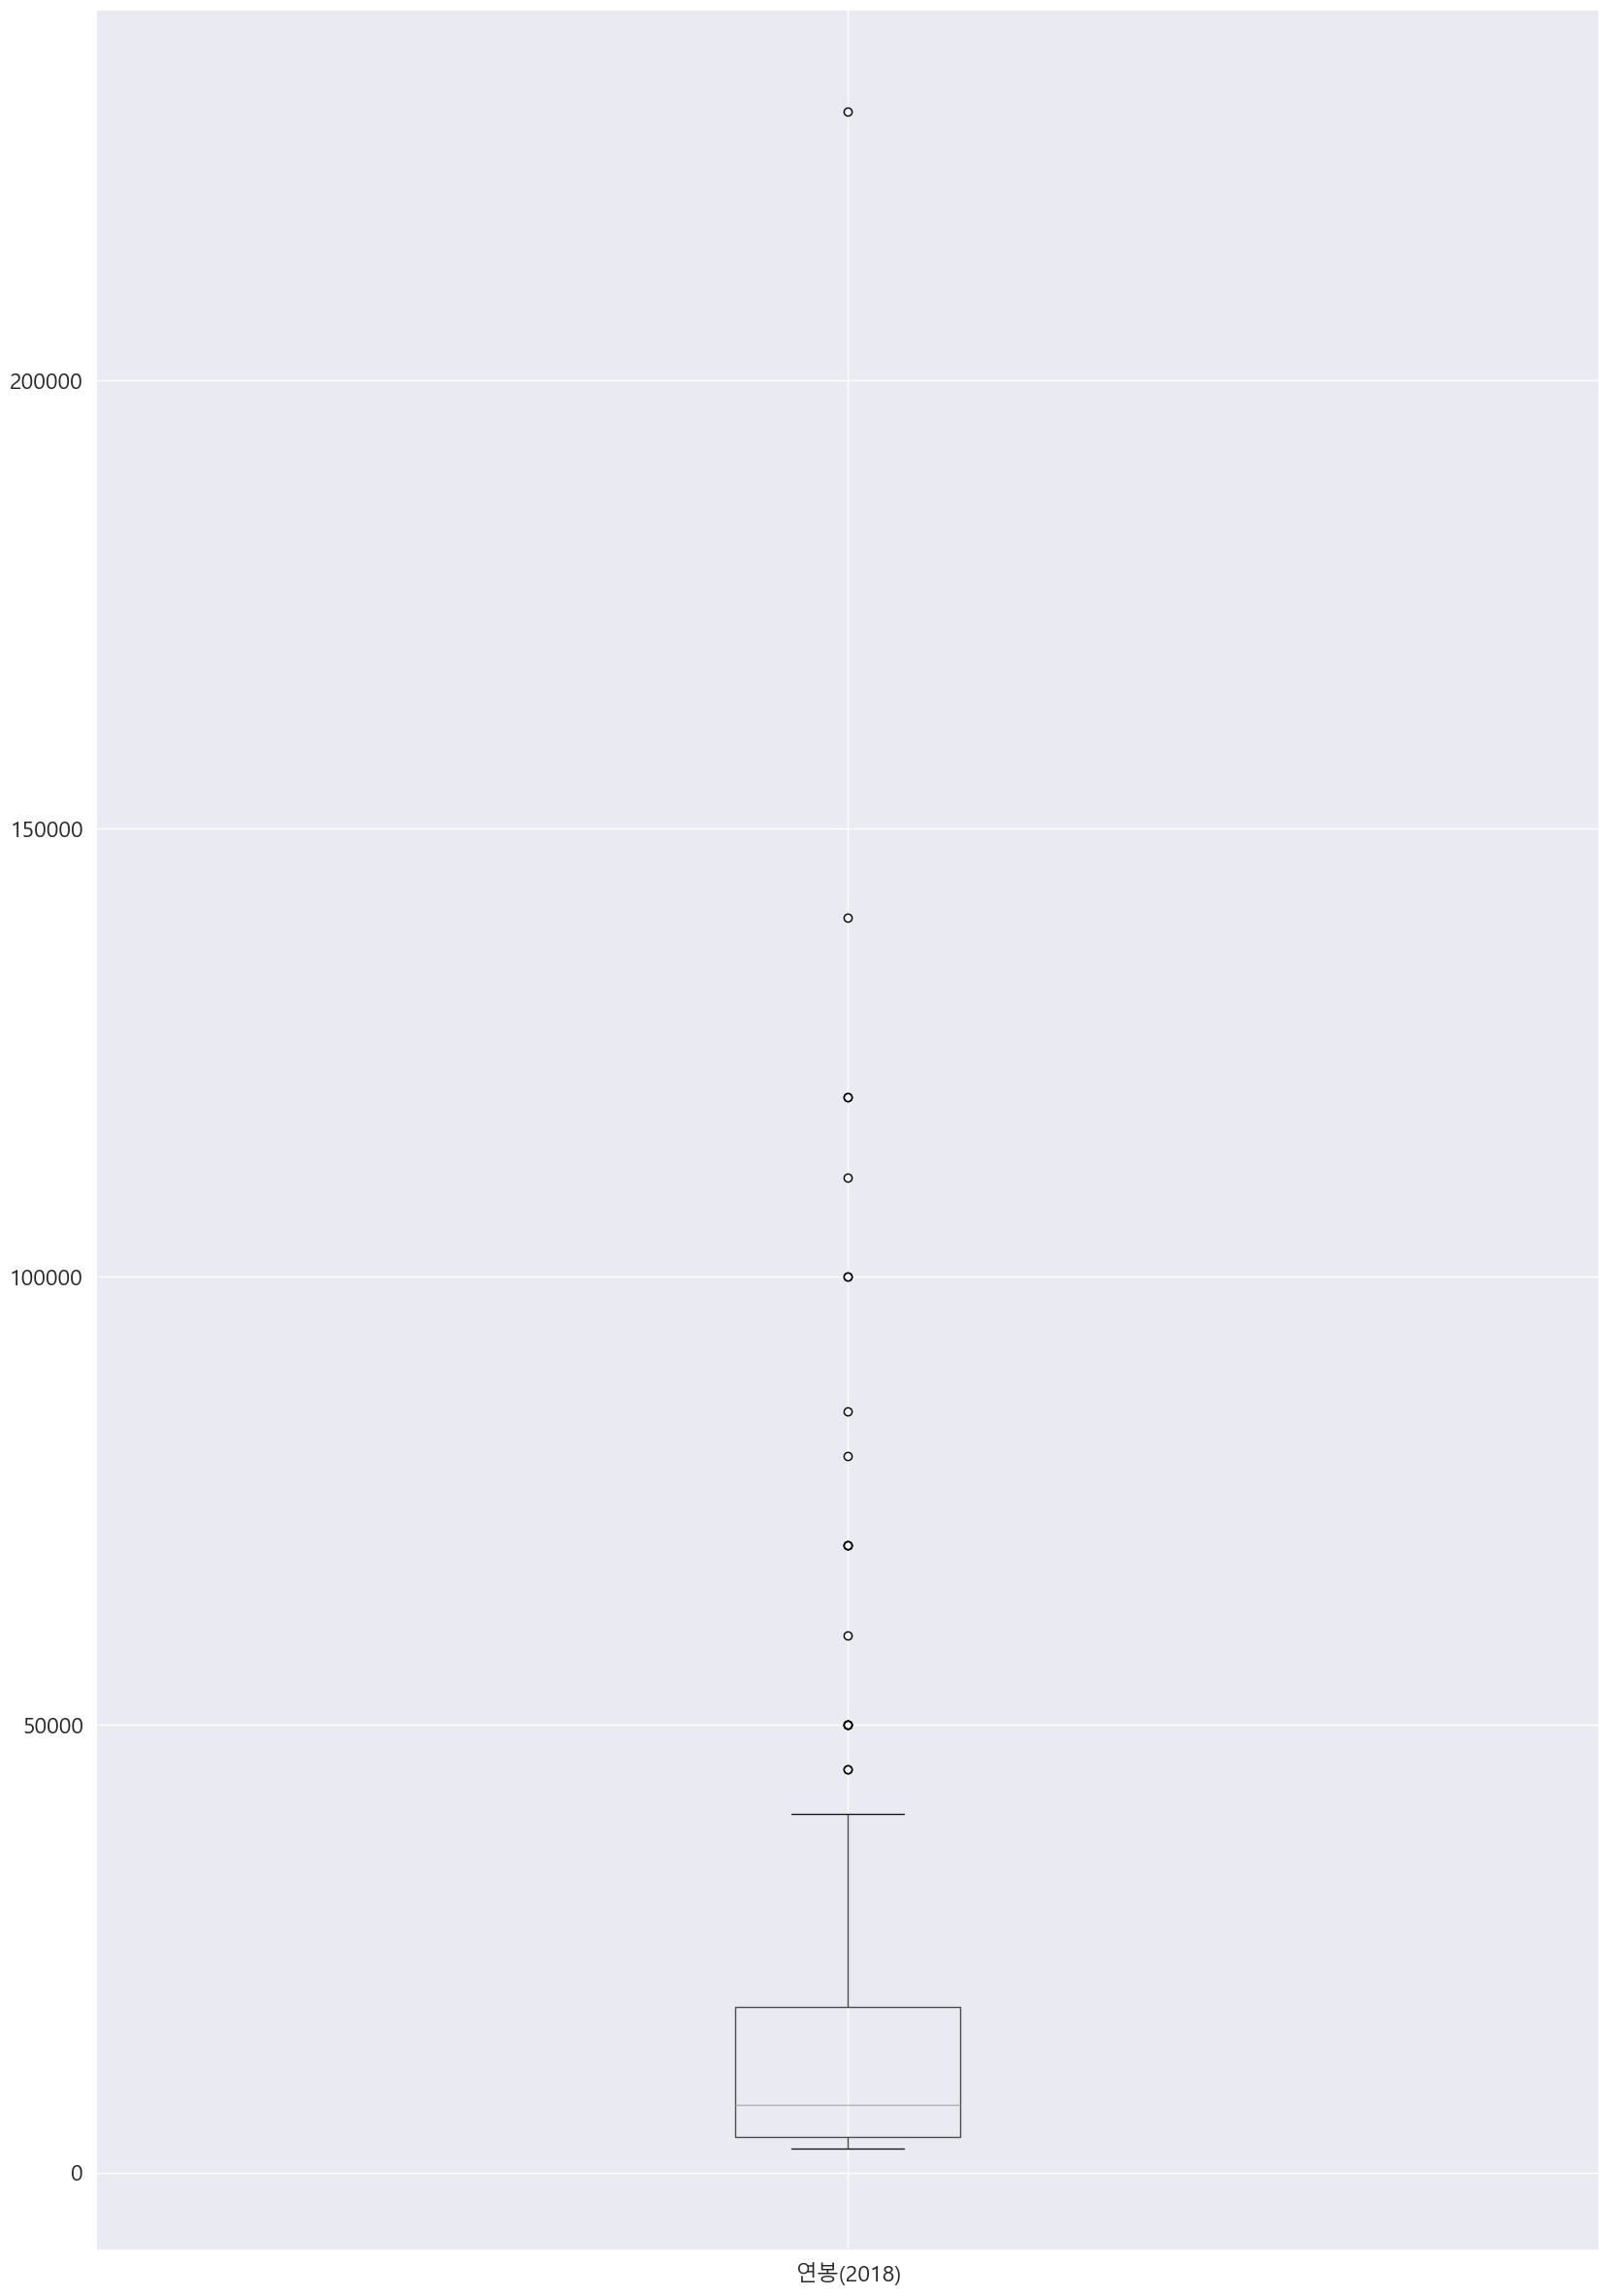

In [391]:
# 주식거래
picher.boxplot(column=['연봉(2018)'])

In [392]:
picher.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [393]:
# picher df
# 선수명, 팀명 제외 df
picher_feature_df = df.iloc[:,2:]

In [394]:
picher_feature_df.columns

Index(['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2018)',
       '연봉(2017)'],
      dtype='object')

In [395]:
# hitmap

In [396]:
import seaborn as sns

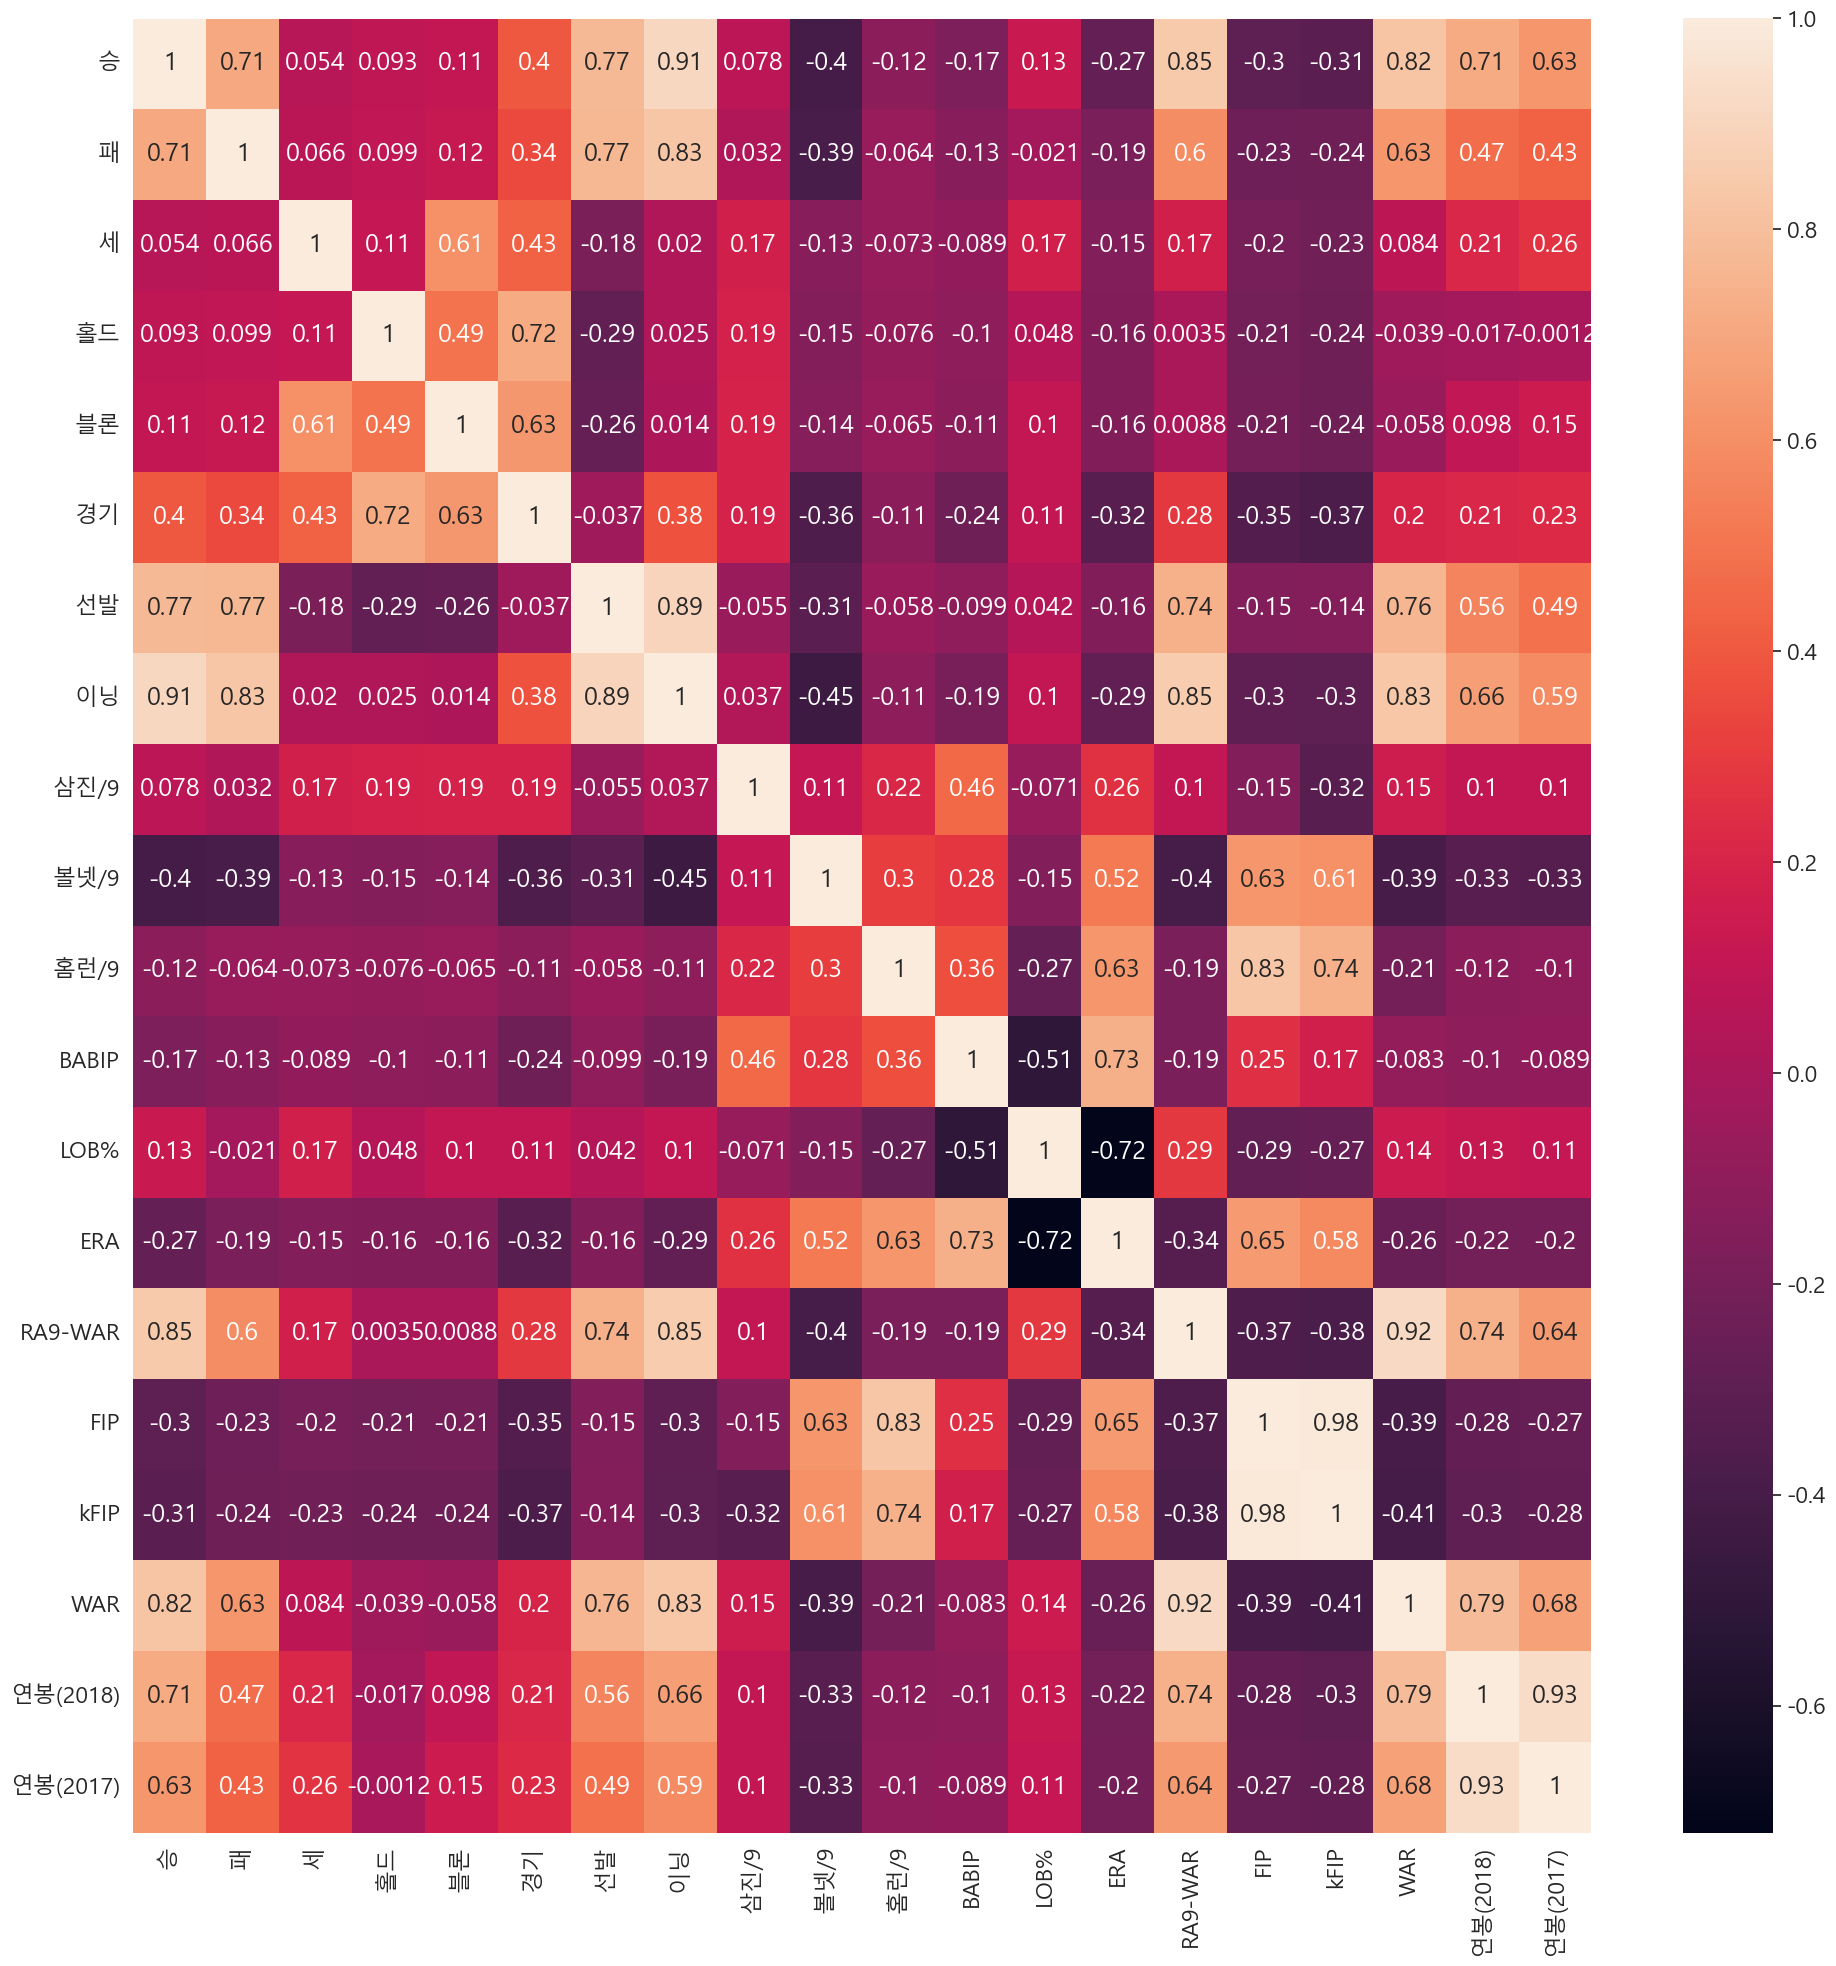

In [397]:
# method :pearson, kendall, spearman
corr = picher_feature_df.corr(method='pearson')
show_cols = picher_feature_df.columns
# sns.set(font_scale=1.5)
plt.figure(figsize=(20,20))
sns.heatmap(corr.values,yticklabels=show_cols,xticklabels=show_cols,annot=True)
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
plt.tight_layout()
plt.show()

In [398]:
# subplot 여러개 hist 출력(5*5)
# fig,axs =plt.subplots
# subplot,subplots,add_subplo,subplot2grid

In [399]:
# 함수 사용해서 각각 그래프 출력
def plot_hist_each_column(df):
    # plt.figure(figsize=(20,20))
    matplotlib.rcParams['font.family'] = 'Malgun Gothic' # windows 사용자
    plt.rcParams['figure.figsize'] = [20,30]
    fig = plt.figure(1)
    for i in range(len(df.columns)):
        ax = fig.add_subplot(5,5,i+1)
        plt.hist(df[df.columns[i]],bins=50) # bins 그래프 폭
        ax.set_title(df.columns[i]) # 컬럼명을 타이틀로 사용

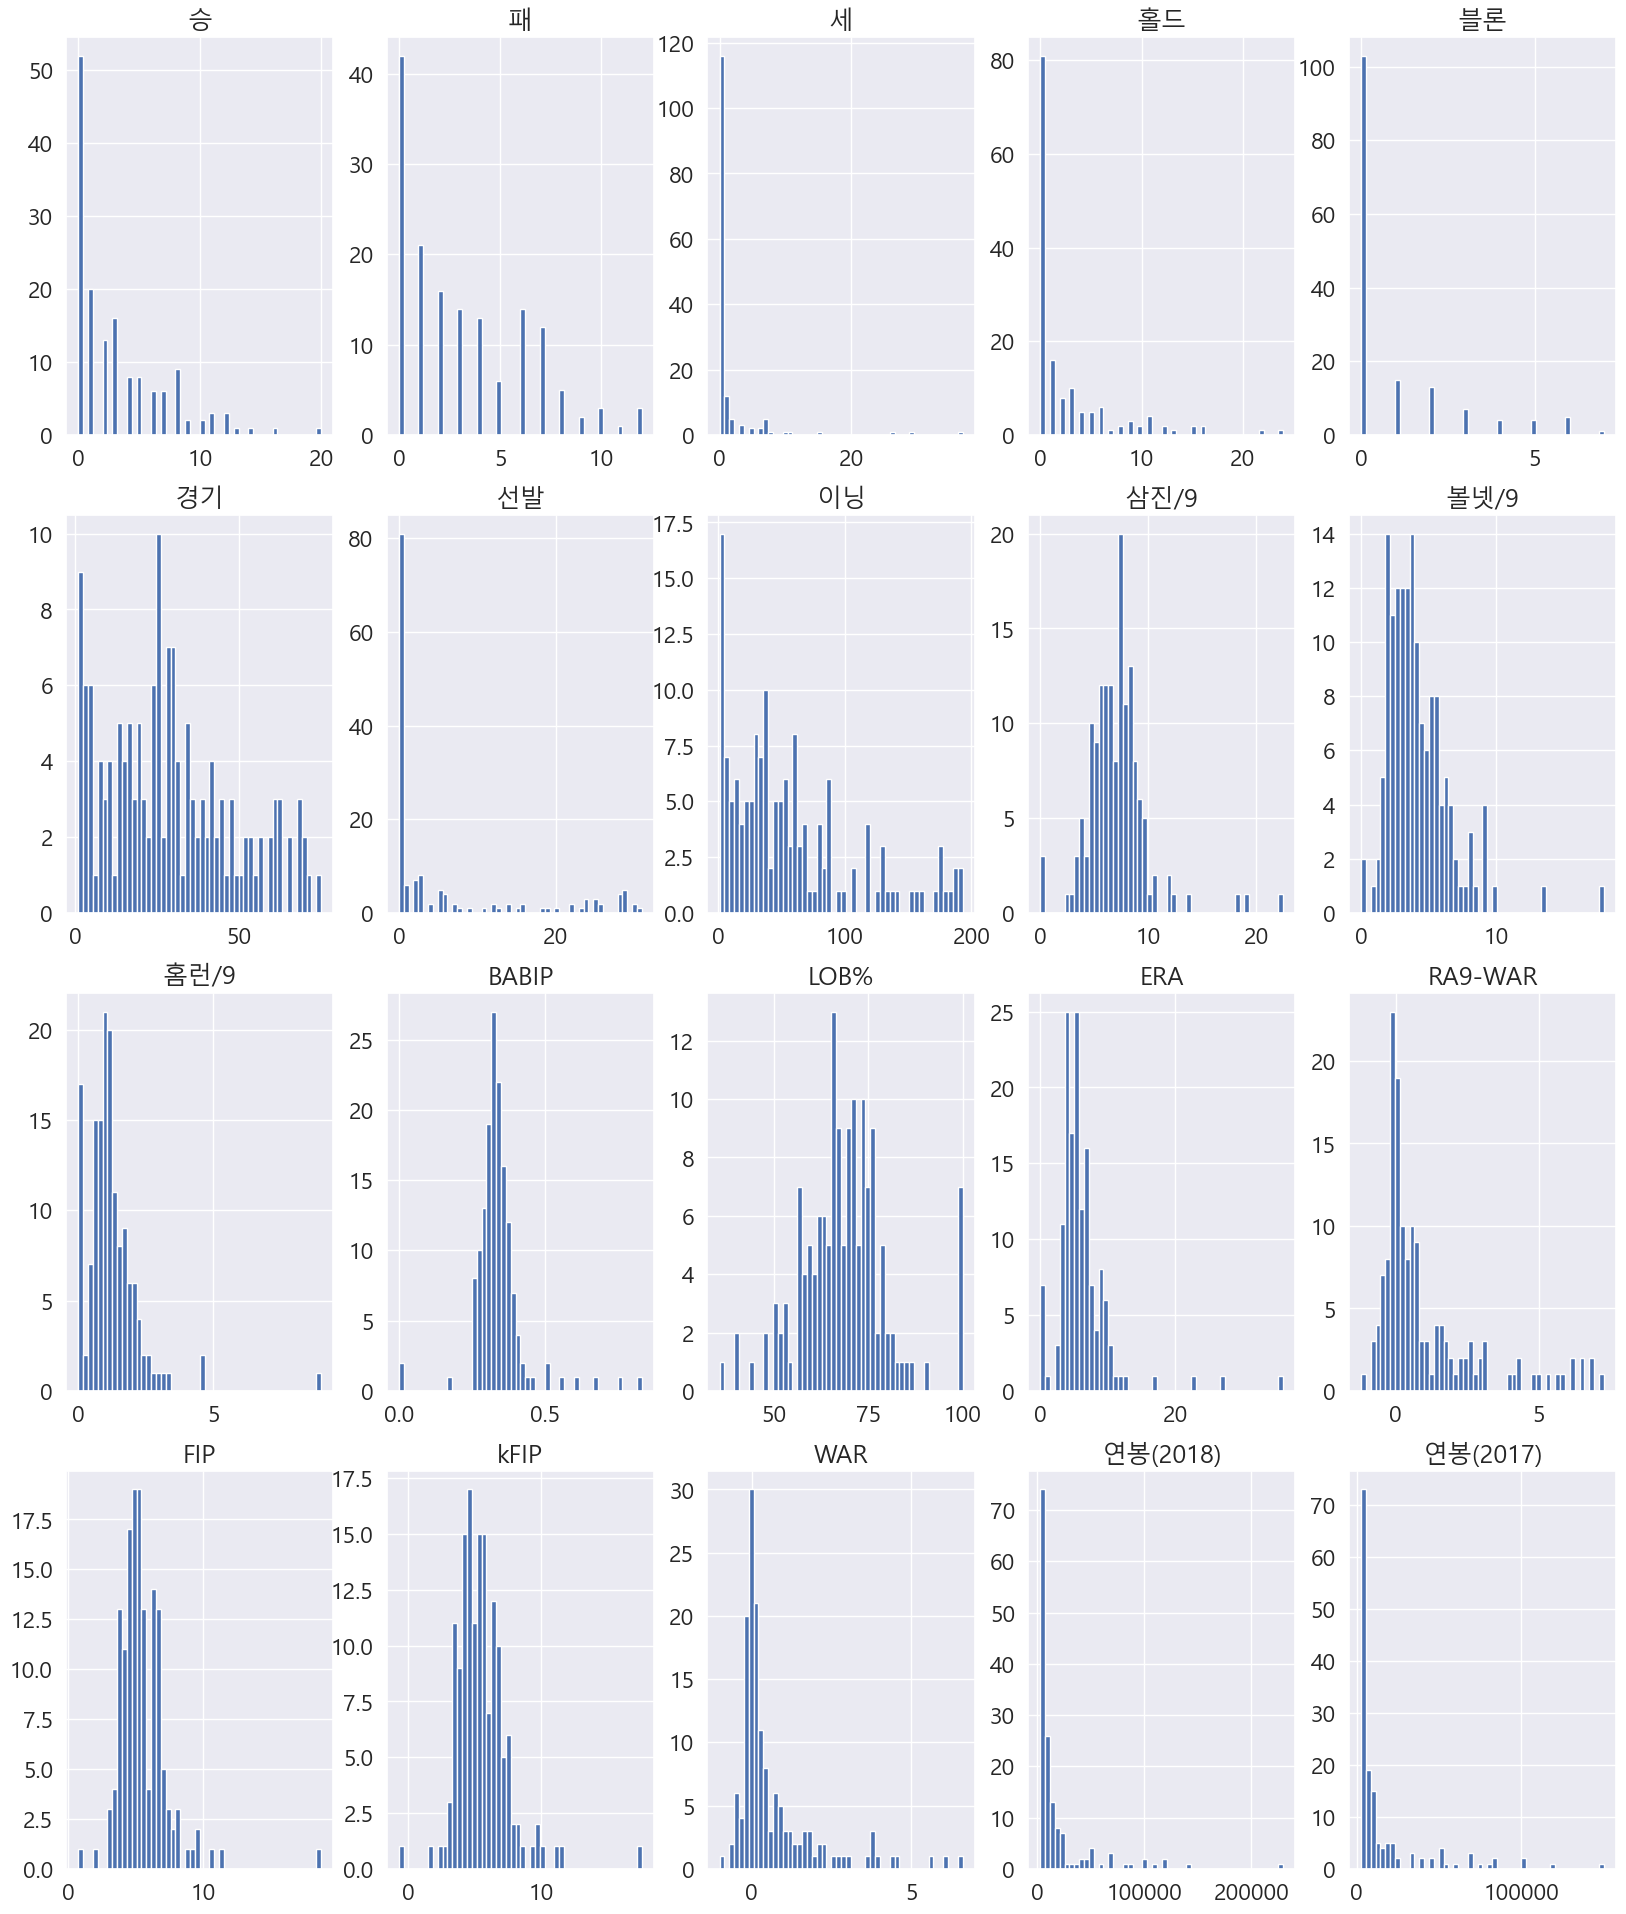

In [400]:
plot_hist_each_column(picher_feature_df)

In [401]:
# 데이터 전처리
# picher - 모든 컬럼 존재
# picher_feature_df - 이름, 팀명 분리

picher_result = picher['연봉(2018)']
picher_result

picher_y_df = picher_feature_df.drop('연봉(2018)',axis=1)
picher_y_df

# picher : 모든 컬럼 존재
# picher_y_df : 연봉(2018), 선수명, 팀명 제외
# picher_feature_df : 선수명, 팀명 제외

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
148,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
149,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000
150,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900


In [402]:
# from sklearn.model_selection import train_test_split
# train_input, test_input, train_target, test_target = train_test_split(
#      picher_y_df,picher_result,random_state=42
# )

In [403]:
# 표준화 작업
# - 팀명이 빠져있는 상태
# -picher_y_df: 선수명, 팀명, 연봉2018 제외, 표준화작업 완료 상태
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(picher_y_df)
picher_y_scaled_df = ss.transform(picher_y_df)

In [404]:
df_numpy = pd.DataFrame(picher_y_scaled_df)
df_numpy.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746


In [405]:
# 선수명, 팀명 합치기 concat: 데이터 프레임 합치기
picher_y_scaled_nt_df = pd.concat([picher.iloc[:,:2],df_numpy],axis=1)
picher_y_scaled_nt_df

# picher_y_scaled_nt_df : 선수명, 팀명 포함한 표준화 작업

,선수명,팀명,0,1,2,3,4,5,6,7,...,9,10,11,12,13,14,15,16,17,18
0,켈리,SK,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,...,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,소사,LG,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,...,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,양현종,KIA,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,...,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,차우찬,LG,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,...,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,레일리,롯데,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,...,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,-0.310932,0.590302,-0.307465,-0.587641,0.682746,0.215009,-0.112380,0.104645,...,-0.375064,0.365057,0.163412,-1.006027,0.412709,-1.233602,0.377052,0.477566,-0.861951,-0.336696
148,정용운,KIA,-0.051252,-0.371047,-0.307465,-0.587641,-0.545389,-0.199334,0.505033,0.042808,...,0.605813,-0.147905,-0.873882,-0.270312,-0.030353,-0.362917,0.484298,0.624396,-0.877127,-0.536985
149,노경은,롯데,-0.830290,-0.371047,-0.307465,-0.587641,-0.545389,-1.028020,-0.421087,-0.852829,...,0.308578,1.223282,0.467836,-1.360901,1.351808,-1.026814,1.352985,1.393990,-0.968185,-0.020240
150,김승현,삼성,-0.830290,-0.050597,-0.307465,-0.365449,-0.545389,0.629352,-0.626891,-0.274355,...,1.200284,0.226952,0.005563,0.465402,-0.066472,-0.792818,0.730962,0.715532,-1.036478,-0.544996


In [406]:
### 원핫인코딩 후 팀명을 추가
df['팀명']
team_encoding = pd.get_dummies(picher['팀명'])
team_encoding

picher_y_scaled_df = pd.DataFrame(picher_y_scaled_df)
picher_y_scaled_df.columns = picher_y_df.columns
picher_y_scaled_df 

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,-0.310932,0.590302,-0.307465,-0.587641,0.682746,0.215009,-0.112380,0.104645,-0.972099,-0.375064,0.365057,0.163412,-1.006027,0.412709,-1.233602,0.377052,0.477566,-0.861951,-0.336696
148,-0.051252,-0.371047,-0.307465,-0.587641,-0.545389,-0.199334,0.505033,0.042808,-0.780490,0.605813,-0.147905,-0.873882,-0.270312,-0.030353,-0.362917,0.484298,0.624396,-0.877127,-0.536985
149,-0.830290,-0.371047,-0.307465,-0.587641,-0.545389,-1.028020,-0.421087,-0.852829,-0.759200,0.308578,1.223282,0.467836,-1.360901,1.351808,-1.026814,1.352985,1.393990,-0.968185,-0.020240
150,-0.830290,-0.050597,-0.307465,-0.365449,-0.545389,0.629352,-0.626891,-0.274355,0.205943,1.200284,0.226952,0.005563,0.465402,-0.066472,-0.792818,0.730962,0.715532,-1.036478,-0.544996


In [407]:
####['FIP','WAR','볼넷/9','삼진/9,'연봉(2017)']
ch =picher_y_scaled_df[['FIP','WAR','볼넷/9','삼진/9','연봉(2017)']]
type(ch)

pandas.core.frame.DataFrame

In [408]:
type(picher_y_scaled_df)

pandas.core.frame.DataFrame

In [409]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
     picher_y_scaled_df, picher_result, random_state=42
)

In [410]:
# train_input, test_input, train_target, test_target = train_test_split(
#     ch, picher_result, random_state=42
# )

In [411]:
# 데이터 학습시키기
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [412]:
print(lr.coef_)

[  4169.92950244  -1239.31005745    265.63136715   -476.56321928
   1021.55685629  -5063.48447231 -10621.99359616   9668.13002831
   -755.66781205   5158.60504416  10504.48709934  -1502.57320436
   -571.37052764    745.66991391  -1100.39335291 -40834.33834115
  31236.59959173  11549.18266232  21364.80742486]


In [413]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9265414273491622
0.830203306517372


In [414]:
# 비슷한 컬럼을 제거
# 상관관계 높은 것은 제거해서 다시  훈련모델 실행
# 더 좋은 성능의 모델을 구현


In [415]:
# ### degree 형태를 늘려서 테스트
### 규제 잘 안됨

In [416]:
#### train 세트 평가서 모듈 statsmodel
import statsmodels.api as sm

train_input = sm.add_constant(train_input)
model = sm.OLS(train_target.astype(int),train_input.astype(int)).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               연봉(2018)   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     51.81
Date:                Thu, 23 May 2024   Prob (F-statistic):           2.27e-41
Time:                        18:10:27   Log-Likelihood:                -1211.9
No. Observations:                 114   AIC:                             2464.
Df Residuals:                      94   BIC:                             2518.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6744.9441   1508.632      4.471      0.000    3749.519    9740.369
승           1.054e+04   3410.081      3.091      0.003    3769.594    1.73e+04
패           -201.7941   2273.457     -0.089      0.929   -4715.795    4312.207
세           2235.5945   1989.137      1.124      0.264   -1713.884    6185.073
홀드          4666.1856   3018.100      1.546      0.125   -1326.323    1.07e+04
블론          2178.8555   1981.078      1.100      0.274   -1754.622    6112.333
경기          -830.0828   2514.239     -0.330      0.742   -5822.164    4161.999
선발          4581.4728   5241.034      0.874      0.384   -5824.723     1.5e+04
이닝          2234.1181   4429.917      0.504      0.615   -6561.587     1.1e+04
삼진/9        -759.6767   2825.855     -0.269      0.789   -6370.479    4851.125
볼넷/9         433.9345   2572.029      0.169      0.866   -4672.890    5540.759
홈런/9        3169.6135   3077.327      1.030      0.306   -2940.492    9279.719
BABIP        397.0166   2706.934      0.147      0.884   -4977.664    5771.697
LOB%         -99.5820   2234.364     -0.045      0.965   -4535.965    4336.801
ERA         -458.6933   3132.397     -0.146      0.884   -6678.141    5760.755
RA9-WAR    -6492.2086   3929.211     -1.652      0.102   -1.43e+04    1309.332
FIP        -5625.9725   4747.477     -1.185      0.239   -1.51e+04    3800.255
kFIP         631.2204   4574.020      0.138      0.891   -8450.603    9713.044
WAR         1.272e+04   3126.995      4.066      0.000    6506.550    1.89e+04
연봉(2017)    2.379e+04   1825.769     13.030      0.000    2.02e+04    2.74e+04
==============================================================================
Omnibus:                       19.056   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.547
Skew:                           0.333   Prob(JB):                     2.39e-17
Kurtosis:                       6.959   Cond. No.                         11.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

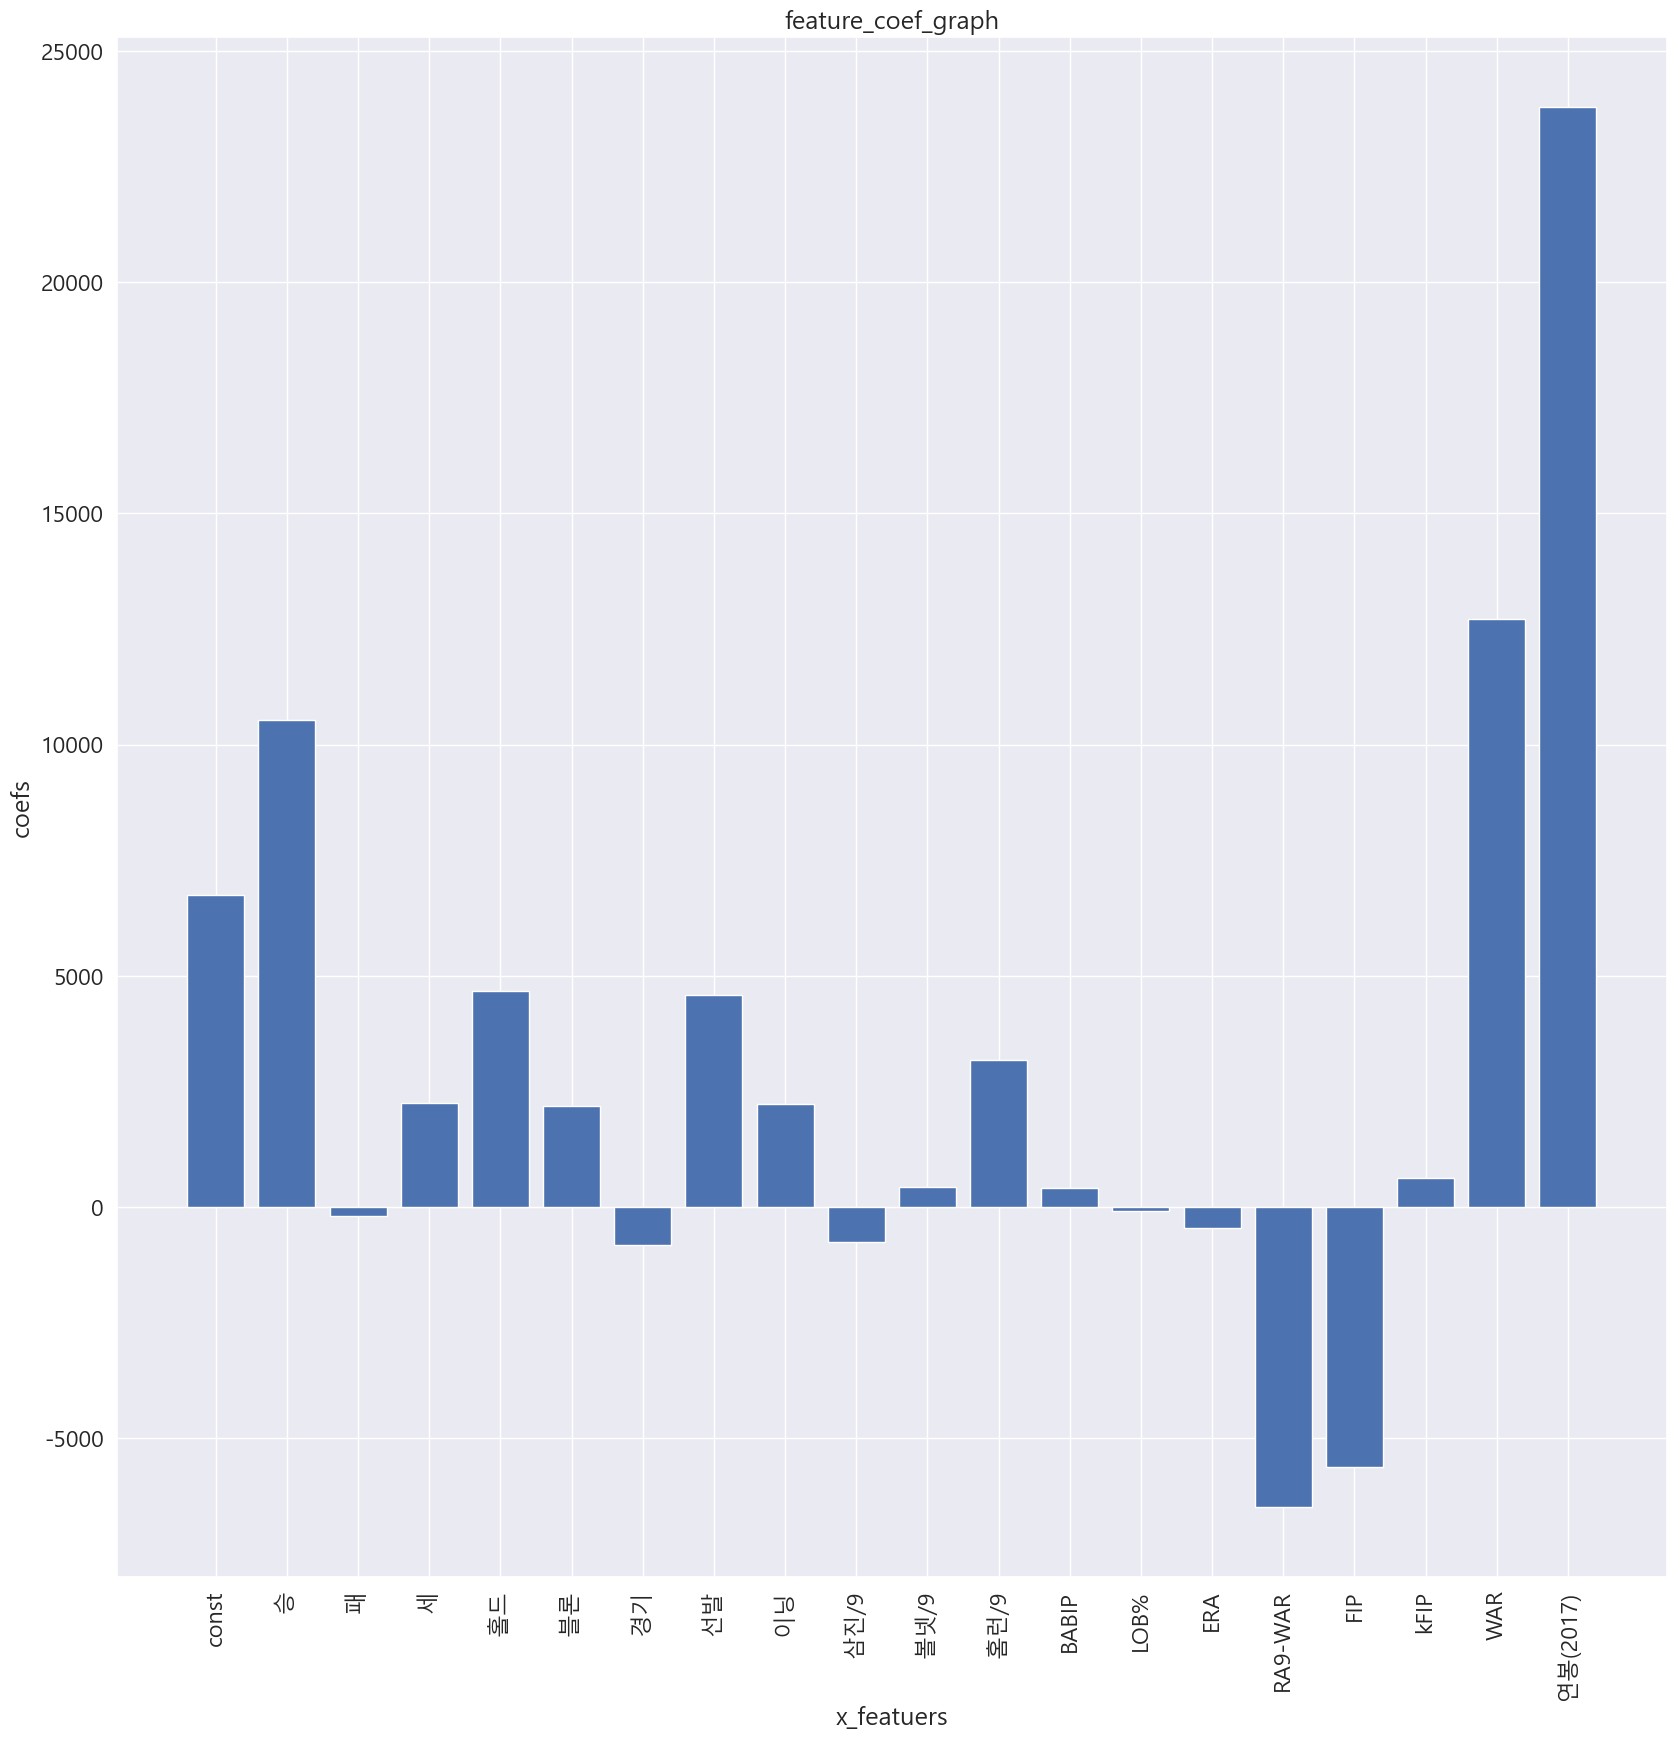

In [417]:
# 평가서를 그래프 출력
plt.figure(figsize=(20,20))
# coefs : 회귀 계수 = 기울기
coefs =model.params.tolist()
coefs_series = pd.Series(coefs)
coefs_series

# 변수명 - 특성이름
x_labels = model.params.index.tolist()

# 그래프 그리기
plt.bar(x_labels,coefs_series)
plt.xticks(rotation=90)
plt.title('feature_coef_graph')
plt.xlabel('x_featuers')
plt.ylabel('coefs')
plt.show()

In [418]:
####['FIP','WAR','볼넷/9','삼진/9,'연봉(2017)']
# 선형회귀 모델 다시 실행
df.columns

Index(['선수명', '팀명', '승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9',
       '볼넷/9', '홈런/9', 'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR',
       '연봉(2018)', '연봉(2017)'],
      dtype='object')

In [419]:
# 회귀분석 예측 - 고려사항 체크
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [420]:
picher_y_scaled_df.columns

Index(['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)'],
      dtype='object')

In [421]:
n_picher_y_scaled_df = picher_y_scaled_df[['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
       'BABIP', 'LOB%', 'ERA','FIP','WAR', '연봉(2017)']]

In [422]:
# 각 피쳐마다 VIF 계수 출력
# target에 어느정도 영향을 끼쳤는지 확인
# 값이 높은 것은 결과 예측에 영향을 많이 미쳤다고 판단
vif = pd.DataFrame() # 선언
vif['VIF Factor'] = [variance_inflation_factor(n_picher_y_scaled_df.values.astype(float),i)for i in range(n_picher_y_scaled_df.shape[1]) ]
vif['features'] = n_picher_y_scaled_df.columns
vif.round(1)                     

,VIF Factor,features
0,7.3,승
1,4.7,패
2,2.6,세
3,3.5,홀드
4,2.7,블론
5,13.6,경기
6,35.8,선발
7,53.6,이닝
8,8.7,삼진/9
9,11.5,볼넷/9


In [423]:
nn_picher_y_scaled_df=picher_y_scaled_df[['경기', '선발', '이닝','볼넷/9', '홈런/9','FIP']]
nn_picher_y_scaled_df

,경기,선발,이닝,볼넷/9,홈런/9,FIP
0,0.059630,2.460174,2.653920,-0.871873,-0.443844,-0.974240
1,0.059630,2.357272,2.556178,-0.990767,-0.670731,-1.065398
2,0.111423,2.563077,2.715757,-0.888857,-0.414250,-0.840183
3,-0.043956,2.254370,2.358699,-0.948305,-0.187363,-0.700764
4,0.059630,2.460174,2.596072,-0.880365,-0.295875,-0.614968
...,...,...,...,...,...,...
147,0.215009,-0.112380,0.104645,-0.375064,0.365057,0.377052
148,-0.199334,0.505033,0.042808,0.605813,-0.147905,0.484298
149,-1.028020,-0.421087,-0.852829,0.308578,1.223282,1.352985
150,0.629352,-0.626891,-0.274355,1.200284,0.226952,0.730962


In [435]:
# 데이터 예측하기
pre_2018 = lr.predict(nn_picher_y_scaled_df)
pre_2018
picher['예측연봉(2018)'] =pd.Series(pre_2018)

In [437]:
picher[['선수명', '팀명','연봉(2017)', '예측연봉(2018)','연봉(2018)']]

,선수명,팀명,연봉(2017),예측연봉(2018),연봉(2018)
0,켈리,SK,85000,99491.948634,140000
1,소사,LG,50000,96803.031967,120000
2,양현종,KIA,150000,96820.791667,230000
3,차우찬,LG,100000,89072.581059,100000
4,레일리,롯데,85000,92817.019917,111000
...,...,...,...,...,...
147,장민재,한화,8100,24481.187919,7100
148,정용운,KIA,3100,248.801785,7500
149,노경은,롯데,16000,-2688.144821,10000
150,김승현,삼성,2900,9603.036438,4000


In [430]:
new_df = nn_picher_y_scaled_df
new_df
picher_result

0      140000
1      120000
2      230000
3      100000
4      111000
        ...  
147      7100
148      7500
149     10000
150      4000
151      4000
Name: 연봉(2018), Length: 152, dtype: int64

In [431]:
train_scaled,test_scaled,train_target, test_target = train_test_split(
     nn_picher_y_scaled_df,picher_result,random_state=42
)
train_scaled.head(2)

,경기,선발,이닝,볼넷/9,홈런/9,FIP
55,1.354452,-0.626891,-0.178608,0.134482,-0.088717,-0.314681
27,1.613416,-0.318184,0.623277,-0.481220,-0.187363,-0.588156


In [432]:
# 데이터 실습시키기
lr =LinearRegression()
lr.fit(train_scaled,train_target)

LinearRegression()

In [433]:
print(lr.score(train_scaled,train_target))
print(lr.score(test_scaled,test_target))

0.5515778528353783
-0.1342451833585876


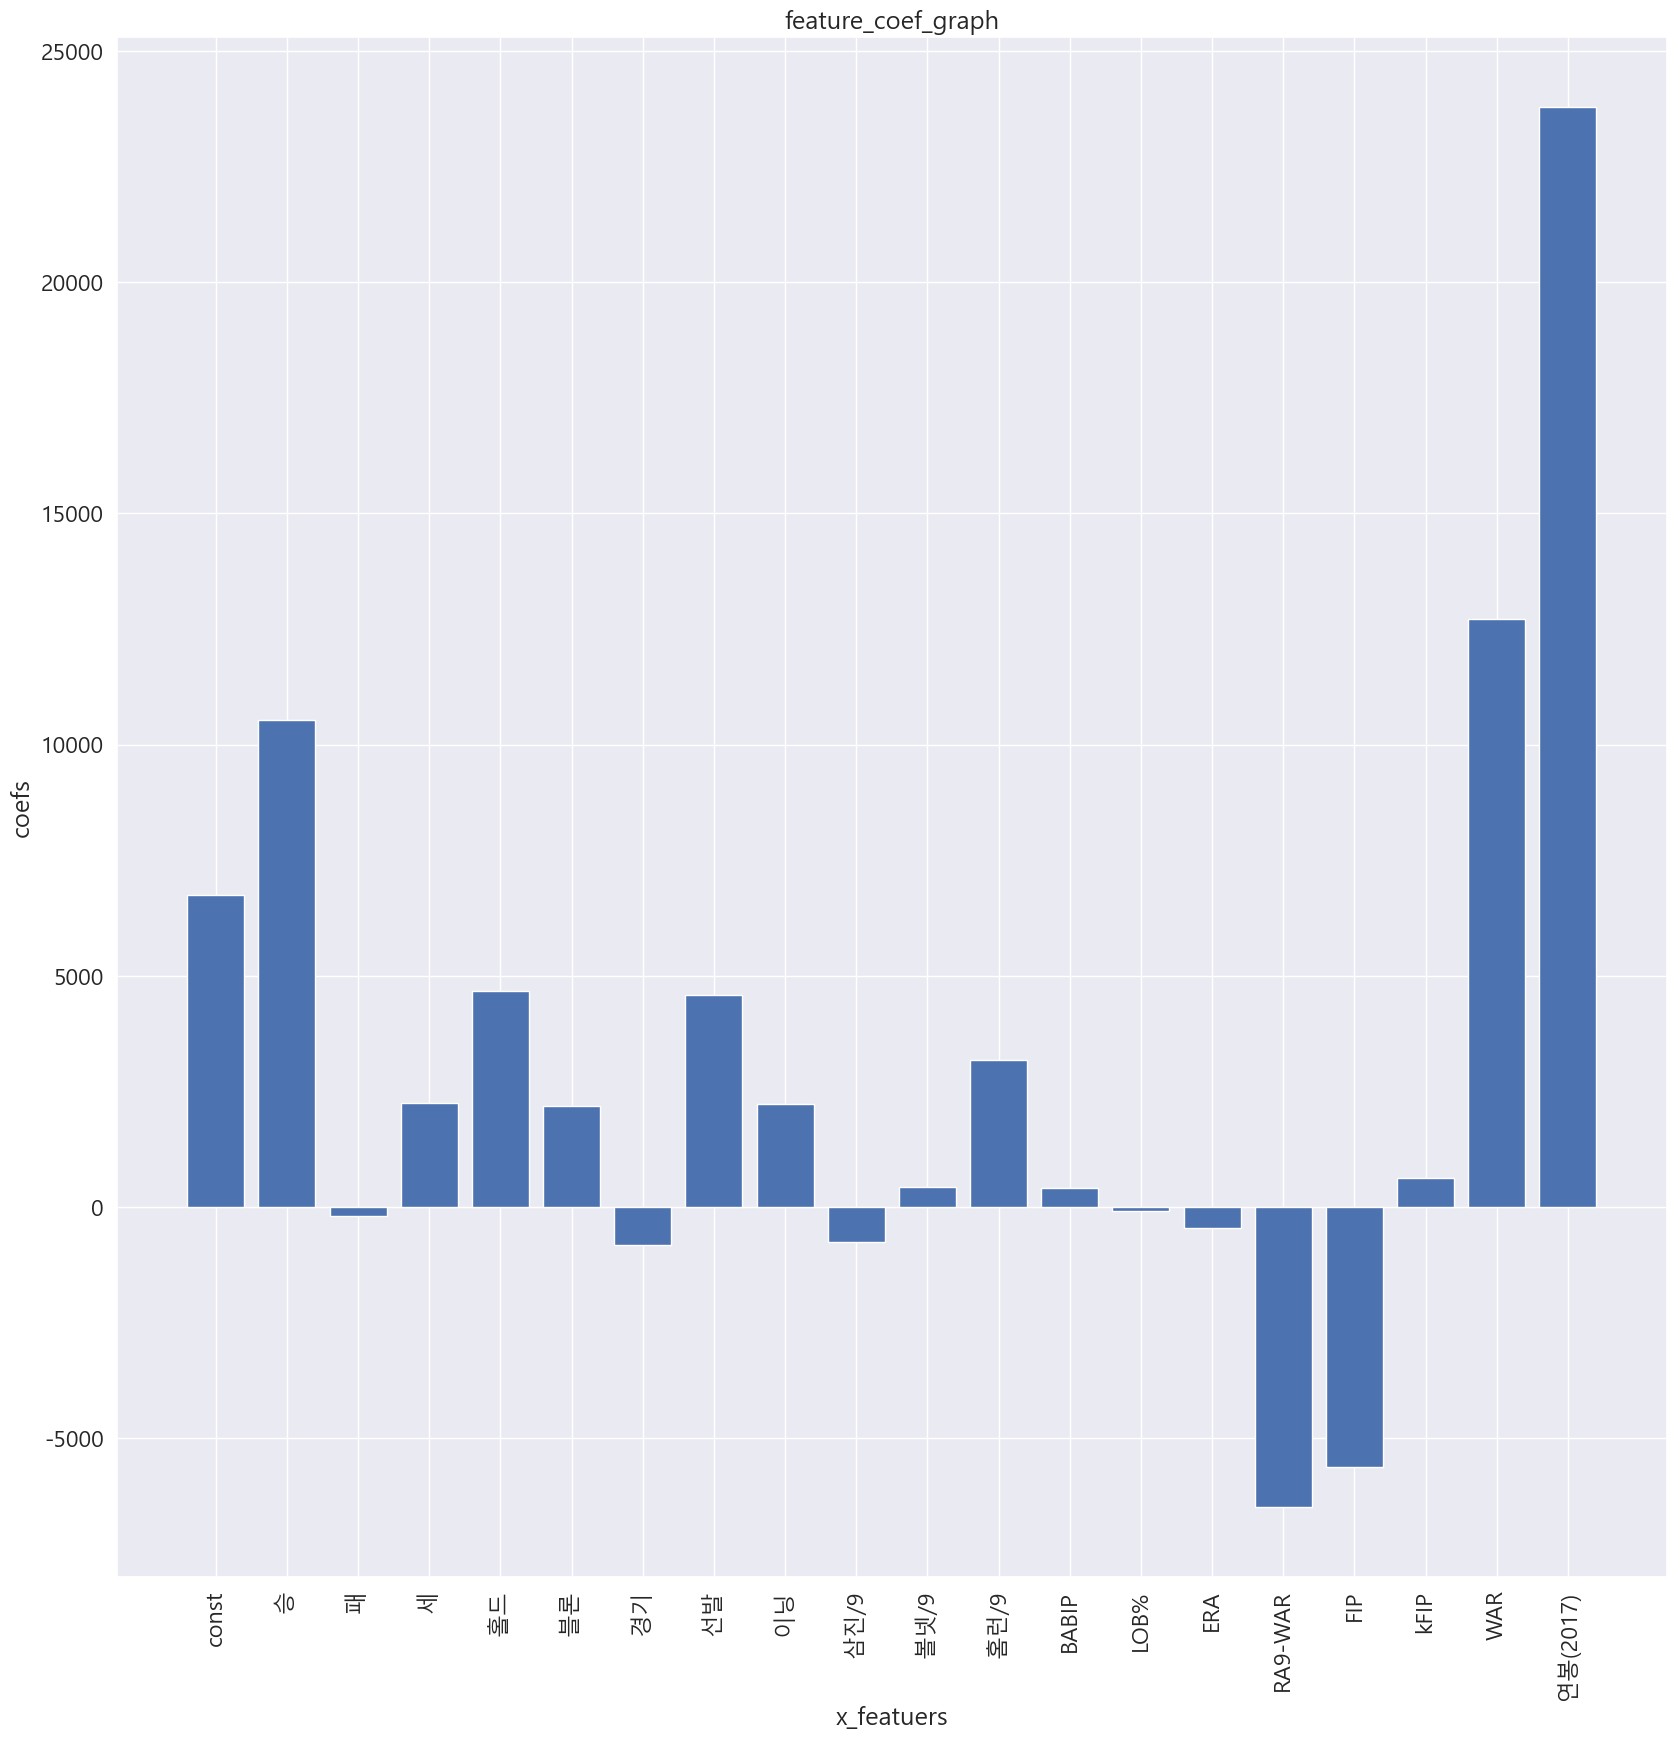

In [428]:
# 평가서를 그래프 출력
plt.figure(figsize=(20,20))
# coefs : 회귀 계수 = 기울기
coefs =model.params.tolist()
coefs_series = pd.Series(coefs)
coefs_series

# 변수명 - 특성이름
x_labels = model.params.index.tolist()

# 그래프 그리기
plt.bar(x_labels,coefs_series)
plt.xticks(rotation=90)
plt.title('feature_coef_graph')
plt.xlabel('x_featuers')
plt.ylabel('coefs')
plt.show()